<a href="https://colab.research.google.com/github/emadruga/python-tests/blob/master/Coursera_Happy_or_sad_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import zipfile

DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2019-04-04 18:50:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-04-04 18:50:32 (125 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_sad_dir = os.path.join('/tmp/h-or-s/sad')


In [3]:
train_happy_names = os.listdir(train_happy_dir)
print(len(train_happy_names))
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(len(train_sad_names))
print(train_sad_names[:10])


40
['happy2-10.png', 'happy1-16.png', 'happy2-12.png', 'happy1-09.png', 'happy1-10.png', 'happy2-14.png', 'happy2-16.png', 'happy1-17.png', 'happy2-08.png', 'happy1-19.png']
40
['sad2-03.png', 'sad1-03.png', 'sad1-15.png', 'sad2-00.png', 'sad2-02.png', 'sad2-15.png', 'sad1-06.png', 'sad2-17.png', 'sad1-11.png', 'sad1-18.png']


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        "/tmp/h-or-s",  
        target_size=(150, 150), 
        batch_size=10,
        class_mode='binary')


Found 80 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
8/8 [==============================] - 3s 346ms/step - loss: 1.4675 - acc: 0.5125
Epoch 2/15
8/8 [==============================] - 3s 333ms/step - loss: 0.4647 - acc: 0.8250
Epoch 3/15
8/8 [==============================] - 3s 322ms/step - loss: 0.3262 - acc: 0.8625
Epoch 4/15
8/8 [==============================] - 3s 328ms/step - loss: 0.1159 - acc: 0.9625
Epoch 5/15
8/8 [==============================] - 3s 333ms/step - loss: 0.1341 - acc: 0.9250
Epoch 6/15
8/8 [==============================] - 3s 326ms/step - loss: 0.0836 - acc: 0.9750
Epoch 7/15
7/8 [=========================>....] - ETA: 0s - loss: 0.0190 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 3s 320ms/step - loss: 0.0213 - acc: 1.0000


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

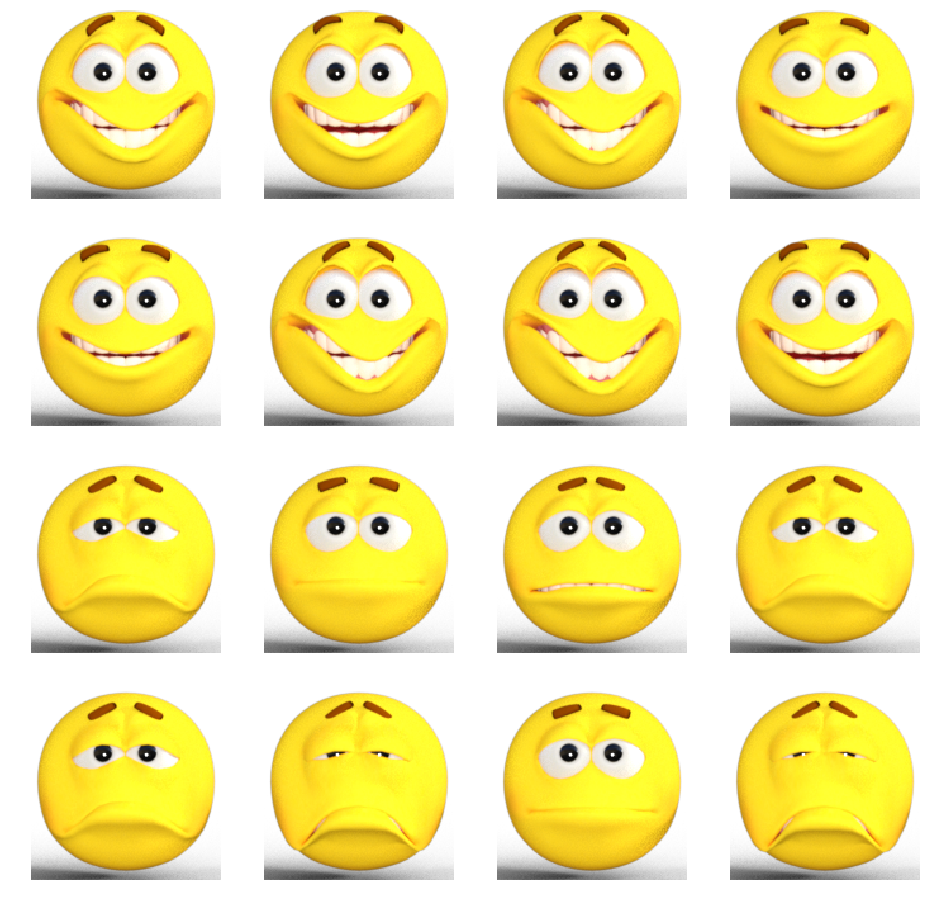

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()